In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



In [21]:
df = pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [22]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [23]:
df.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [24]:
df['Gender'] = df['Gender'].map({'Male' : 1, "Female": 0})
df['Gender']

0      1
1      1
2      0
3      0
4      1
      ..
395    0
396    1
397    0
398    1
399    0
Name: Gender, Length: 400, dtype: int64

In [28]:
X = df[['Gender', 'Age', 'EstimatedSalary']]
y = df['Purchased']
X

,Gender,Age,EstimatedSalary
0,1,19,19000
1,1,35,20000
2,0,26,43000
3,0,27,57000
4,1,19,76000
...,...,...,...
395,0,46,41000
396,1,51,23000
397,0,50,20000
398,1,36,33000


## Logistic Regression

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

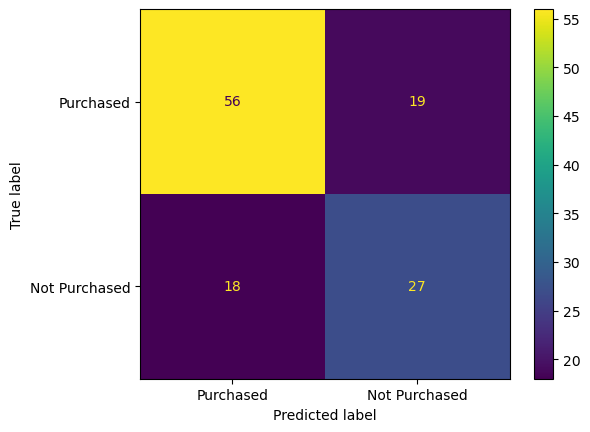

In [47]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Purchased', 'Not Purchased']).plot()
plt.show()

In [51]:
cm

array([[56, 19],
       [18, 27]], dtype=int64)

In [53]:
TP, FN, FP, TN = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

precision = TP/(TP + FP)
recall = TP/(TP + FN)
accuracy = (TP + TN)/(TP + FP + TN + FN)
error_rate = 1 - accuracy

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Rrror Rate: {error_rate}")


Precision: 0.7567567567567568
Recall: 0.7466666666666667
Accuracy: 0.6916666666666667
Rrror Rate: 0.30833333333333335


## Gaussian Naive Bayes

In [56]:
model = GaussianNB()

model.fit(X_train, y_train)


GaussianNB()

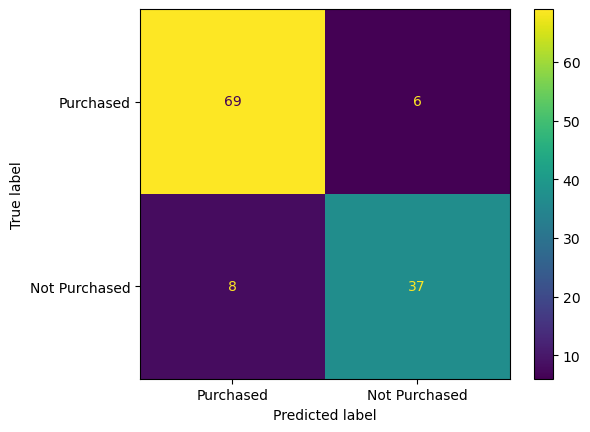

In [58]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Purchased', 'Not Purchased']).plot()
plt.show()


In [59]:
TP, FN, FP, TN = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

precision = TP/(TP + FP)
recall = TP/(TP + FN)
accuracy = (TP + TN)/(TP + FP + TN + FN)
error_rate = 1 - accuracy

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Rrror Rate: {error_rate}")

Precision: 0.8961038961038961
Recall: 0.92
Accuracy: 0.8833333333333333
Rrror Rate: 0.1166666666666667


## Random Forest 

In [60]:
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

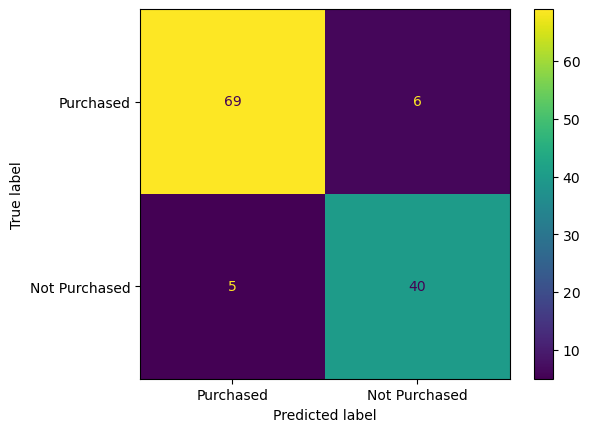

In [61]:
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=['Purchased', 'Not Purchased']).plot()
plt.show()

In [62]:
TP, FN, FP, TN = cm[0,0], cm[0,1], cm[1,0], cm[1,1]

precision = TP/(TP + FP)
recall = TP/(TP + FN)
accuracy = (TP + TN)/(TP + FP + TN + FN)
error_rate = 1 - accuracy

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Accuracy: {accuracy}")
print(f"Rrror Rate: {error_rate}")

Precision: 0.9324324324324325
Recall: 0.92
Accuracy: 0.9083333333333333
Rrror Rate: 0.09166666666666667
